In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:

data = pd.read_csv('Electricity BILL.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(f"Train set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")


Train set shape: (1000, 16)
Test set shape: (250, 16)


c:\Users\arava\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


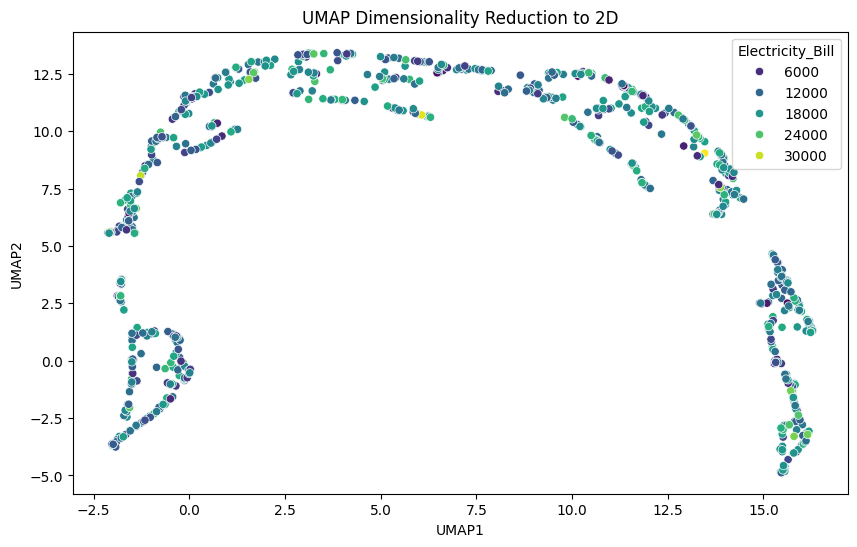

In [5]:

features = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
            'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate',
            'Indoor_Air_Quality', 'Smart_Devices_Count', 'Green_Certified', 
            'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents', 'Electricity_Bill']

data = train_data[features]

# Apply UMAP to reduce dimensions to 2
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(data)

# Create a DataFrame for the UMAP results
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_df, hue=train_data['Electricity_Bill'], palette='viridis')
plt.title('UMAP Dimensionality Reduction to 2D')
plt.show()
